In [7]:
print(id(hq))
d = hq.heapify([])
print(id(d))

140396939479136
9484816


In [8]:
x = Variable(np.array(2.0))
a = square(x)
b = square(a)
c = square(a)
y = add(b, c)
y.backward()
print(y.data, x.grad, a.grad)
print(x, a, b, c, y)

32.0 64.0 None
variable(2.0) variable(4.0) variable(16.0) variable(16.0) variable(32.0)


In [17]:
x = Variable(np.array(2.0))
y = x ** 3
y.backward()
print(y, x.grad)

variable(8.0) 12.0


In [10]:
with no_grad():
    x = Variable(np.array(2.0))
    y = square(x)

In [1]:
import numpy as np
import math
from dezero import Variable
from dezero import Function
from dezero.utils import plot_dot_graph
from dezero.functions import sin, cos

def maclaurin_sin(x, threshold=1e-4):
    y = 0
    for i in range(10000):
        c = (-1)**i / math.factorial(2*i+1)
        t = c*x**(2*i+1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y    

def goldstein(x, y):
    z = (1 + (x+y+1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

x = Variable(np.array(1.0))
y = sin(x)
y.backward(create_graph=True)

for i in range(3):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    print(x.grad)

# y = Variable(np.array(1.0))
# z = goldstein(x, y)
# z.backward()
# plot_dot_graph(z)`


variable(-0.8414709848078965)
variable(-0.5403023058681398)
variable(0.8414709848078965)


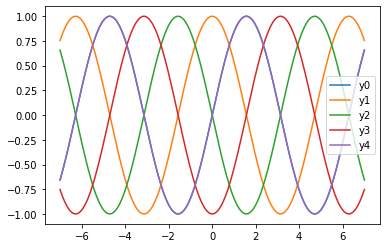

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

x = Variable(np.linspace(-7, 7, 200))
y = F.sin(x)
y.backward(create_graph=True)

logs = [y.data]

for i in range(4):
    logs.append(x.grad.data)
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

for i, v in enumerate(logs):
    plt.plot(x.data, logs[i], label=f"y{i}")
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([1, 2, 3]))
y = F.sum(x)
y.backward()
y

ValueError: cannot reshape array of size 1 into shape (3,)

In [5]:
import numpy as np
from dezero import Variable
from dezero import Function
from dezero.utils import plot_dot_graph

def f(x):
    return x / 2*x
#def f(x):
#    return x**4 - 2*x**2
x = Variable(np.array(2.0))
y = f(x)

x.name = 'x'
y.name = 'y'

y.backward(create_graph=True)
gx = x.grad
gx.backward(create_graph=True)
ggx = x.grad

print(x.grad, gx, ggx)
plot_dot_graph(ggx)

variable(3.0) variable(2.0) variable(3.0)
dot /home/cod3holic/.dezero/tmp_graph.dot -T png -o dot.png


In [7]:
def rosenbrock(x0, x1):
    return 100 * (x1 - x0**2) **2 + (1 - x0)**2

x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))
lr = 1e-3
iters = 10000

for _ in range(iters):
    print(x0, x1)

    y = rosenbrock(x0, x1)
    
    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

045714339636)
variable(0.6854488578953651) variable(0.4683404531883704)
variable(0.6854706498673068) variable(0.46837044686040424)
variable(0.6854924394263777) variable(0.4684004381597863)
variable(0.6855142265730166) variable(0.4684304270868051)
variable(0.6855360113076621) variable(0.468460413641749)
variable(0.6855577936307524) variable(0.4684903978249064)
variable(0.685579573542726) variable(0.4685203796365656)
variable(0.6856013510440211) variable(0.4685503590770148)
variable(0.6856231261350756) variable(0.46858033614654226)
variable(0.6856448988163275) variable(0.4686103108454361)
variable(0.6856666690882146) variable(0.46864028317398443)
variable(0.6856884369511747) variable(0.4686702531324753)
variable(0.6857102024056453) variable(0.46870022072119666)
variable(0.6857319654520639) variable(0.46873018594043653)
variable(0.6857537260908679) variable(0.46876014879048283)
variable(0.6857754843224946) variable(0.46879010927162335)
variable(0.685797240147381) variable(0.46882006738414

In [23]:
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..')) # 환경변수(PATH) 설정

In [10]:
def f(x):
    return x**4 - 2*x**2

x = Variable(np.array(2.0))
iters = 10

for i in range(iters):
    print(i, x)

    y = f(x)
    x.cleargrad()
    y.backward(create_graph = True)
    
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph = True)

    gx2 = x.grad
    x.cleargrad()
    gx2.backward(create_graph = True)
    
    gx3 = x.grad
    print(id(gx3), id(gx2), id(gx), id(x.grad), id(x))

    x.data -= gx.data / gx2.data

0 variable(2.0)
139806395483472 139806405542048 139806405436992 139806395483472 139806395985104
1 variable(1.4545454545454546)
139806402362288 139806402415104 139806402436976 139806402362288 139806395985104
2 variable(1.1510467893775467)
139806395575888 139806402248128 139806402361904 139806395575888 139806395985104
3 variable(1.0253259289766978)
139806397471280 139806404407696 139806395573344 139806397471280 139806395985104
4 variable(1.0009084519430513)
139806397247936 139806397444592 139806397470032 139806397247936 139806395985104
5 variable(1.0000012353089454)
139806396597920 139806397333664 139806397334336 139806396597920 139806395985104
6 variable(1.000000000002289)
139806396483904 139806403888176 139806398226928 139806396483904 139806395985104
7 variable(1.0)
139806400660624 139806403247024 139806396482560 139806400660624 139806395985104
8 variable(1.0)
139806405270592 139806400802336 139806398083184 139806405270592 139806395985104
9 variable(1.0)
139806404480832 139806404498480

In [24]:
import os
os.path.dirname(__file__)

NameError: name '__file__' is not defined

## External Modules

In [2]:
!pip install memory_profiler
!apt install graphviz

[sudo] password for cod3holic: 


## Note

In [ ]:
x = Variable(np.array(2.0))
y = f(x)
'''
y {
    data: f(x)
    graph(relation): f
    grad: None
}
x {
    data: x
    graph(relation): [f]
    grad: None
}
'''
y.backward(create_graph = True)
gx = x.grad
'''
y {
    data: f
    graph(relation): f
    grad: None
}
x {
    data: x
    graph(relation): [f, df/dx]
    grad: gx
}
gx {
    data: gx.data
    graph(relation): df/dx
    grad: None
}
'''
print(gx, x.grad, x)
x.cleargrad()
'''
y {
    data: f(x)
    grad: None
}
x {
    data: x
    graph(relation): [f, df/dx]
    grad: None
}
gx {
    data: gx
    graph(relation): df/dx
    grad: None
}
'''
gx.backward(create_graph = True)
gx2 = x.grad
'''
y...
x {
    data: x
    graph(relation): [f, df/dx, d^2f/dx^2]
    grad: gx2
}
gx {
    data: gx
    graph(relation): [df/dx, d^2f/dx^2]
    grad: None
}
gx2 {
    data: gx2
    graph(relation): d^2f/dx^2
    grad: None
}
'''
print(gx2, gx, x.grad, x)
gx2.cleargrad()
gx2.backward(create_graph = False) # create_graph = False일 때
'''
y...
x {
    data: x
    graph(relation): [f, df/dx, d^2f/dx^2]
    grad: gx3
}
gx {
    data: gx
    graph(relation): [df/dx, d^2f/dx^2]
    grad: None
}
gx2 {
    data: gx2
    graph(relation): d^2f/dx^2
    grad: None
}
gx3 {
    data: gx3
    graph(relation):None
    grad: None
}
'''
gx3 = x.grad

print(gx3, gx2, gx, x.grad, x)